In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling as pd_pi
import seaborn as sns
%matplotlib inline
from sklearn import preprocessing as pre
from sklearn.pipeline import Pipeline as pipe
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
import random
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt

In [2]:
#KIVA DATA
###########
data = pd.read_csv('kiva_topic_assigned.csv')
data = data.drop(['Unnamed: 0','en'], axis=1)
topic_dummy = pd.get_dummies(data.topic)
country_dummy = pd.get_dummies(data.country)
gender_dummy = pd.get_dummies(data.gender)
nonpayment_dummy = pd.get_dummies(data.nonpayment)
sector_dummy = pd.get_dummies(data.sector)
data = pd.concat([data, topic_dummy, country_dummy, gender_dummy, nonpayment_dummy, sector_dummy], axis=1)
data = data.drop(['topic', 'country', 'gender', 'nonpayment', 'sector'], axis=1)

In [5]:
def setup(data, 
          target, 
          split=0.7):
    
  from sklearn.model_selection import train_test_split
  X = data.drop(target,axis=1)
  y = data[target]
  global X_train, X_test, y_train, y_test, seed
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-split)
  import random
  seed = random.randint(150,900)

In [6]:
setup(data, 'status')

In [7]:
def create_model(estimator = None, 
                 ensemble = False, 
                 method = 'Bagging', 
                 fold = 10, 
                 round = 4,  
                 verbose = True):
  
  #defining X_train and y_train    
  data_X = X_train
  data_y = y_train
  
  #ignore co-linearity warnings for qda and lda 
  import warnings
  warnings.filterwarnings('ignore') 
  
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.svm import LinearSVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold  
  from sklearn.model_selection import StratifiedKFold
  from sklearn.linear_model import RidgeClassifier
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
  from yellowbrick.classifier import roc_auc
  from yellowbrick.classifier import ROCAUC
  from yellowbrick.classifier import discrimination_threshold
  from yellowbrick.classifier import precision_recall_curve
  from yellowbrick.classifier import confusion_matrix
  from yellowbrick.classifier import class_prediction_error
  from yellowbrick.classifier import classification_report
    
  kf = StratifiedKFold(fold, random_state=seed)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
    
  if estimator == None:
    print("Please enter your custom model as on object or choose from model library. If you have previously defined the estimator, the output is generated using the same estimator") 
  elif estimator == 'lr':
    model = LogisticRegression(random_state=seed)
    full_name = 'Logistic Regression'
  elif estimator == 'knn':
    model = KNeighborsClassifier()
    full_name = 'K Nearest Neighbours'
  elif estimator == 'nb':
    model = GaussianNB()
    full_name = 'Naive Bayes'
  elif estimator == 'dt':
    model = DecisionTreeClassifier(random_state=seed)
    full_name = 'Decision Tree'
  elif estimator == 'svm':
    model = SGDClassifier(max_iter=1000, tol=0.001, random_state=seed)
    full_name = 'Support Vector Machine'
  elif estimator == 'rbfsvm':
    model = SVC(gamma='auto', C=1, probability=True, kernel='rbf', random_state=seed)
    full_name = 'RBF SVM'
  elif estimator == 'gpc':
    model = GaussianProcessClassifier(random_state=seed)
    full_name = 'Gaussian Process Classifier'
  elif estimator == 'mlp':
    model = MLPClassifier(max_iter=500, random_state=seed)
    full_name = 'Multi Level Perceptron'    
  elif estimator == 'ridge':
    model = RidgeClassifier(random_state=seed)
    full_name = 'Ridge Classifier'        
  elif estimator == 'rf':
    model = RandomForestClassifier(n_estimators=10, random_state=seed)
    full_name = 'Random Forest Classifier'    
  elif estimator == 'qda':
    model = QuadraticDiscriminantAnalysis()
    full_name = 'Quadratic Discriminant Analysis'    
  elif estimator == 'ada':
    model = AdaBoostClassifier(random_state=seed)
    full_name = 'AdaBoost Classifier'        
  elif estimator == 'gbc':
    model = GradientBoostingClassifier(random_state=seed)
    full_name = 'Gradient Boosting Classifier'          
  elif estimator == 'lda':
    model = LinearDiscriminantAnalysis()
    full_name = 'Linear Discriminant Analysis'
  elif estimator == 'et':
    model = ExtraTreesClassifier(random_state=seed)
    full_name = 'Extra Trees Classifier'
  else:
    model = estimator
    full_name = str(model).split("(")[0]
  
  #checking ensemble method
    
  if ensemble and method == 'Bagging':
    model = BaggingClassifier(model,bootstrap=True,n_estimators=10, random_state=seed)
  elif ensemble and method == 'Boosting':
    model = AdaBoostClassifier(model, random_state=seed)
  elif method == 'Boosting':
    model = AdaBoostClassifier(model, random_state=seed)
     
  for train_i , test_i in kf.split(data_X,data_y):
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
    
    if hasattr(model, 'predict_proba'):
        
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        
    else:
        
        model.fit(Xtrain,ytrain)
        pred_prob = 0.00
        pred_prob = 0.00
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = 0.00
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_) #change pred_prob to pred_
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa) 
       
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
      
  model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  model_results_unpivot = pd.melt(model_results,value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa'])
  model_results_unpivot.columns = ['Metric', 'Measure']
  model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  model_results = model_results.append(model_avgs)
  model_results = model_results.round(round)  
 
  if verbose:
    from IPython.display import display, HTML
    display(HTML(model_results.to_html()))
    return model
  else:
    return model

In [8]:
def ensemble_model(estimator,
                   method = 'Bagging', 
                   fold = 10,
                   n_estimators = 10,
                   round = 4,  
                   verbose = True):
    
    #defining X_train and y_train    
    data_X = X_train
    data_y = y_train
  
    #ignore co-linearity warnings for qda and lda 
    import warnings
    warnings.filterwarnings('ignore') 
    
    #defining estimator as model
    model = estimator
     
    if method == 'Bagging':
        from sklearn.ensemble import BaggingClassifier
        model = BaggingClassifier(model,bootstrap=True,n_estimators=n_estimators, random_state=seed)
        
    else:
        from sklearn.ensemble import AdaBoostClassifier
        model = AdaBoostClassifier(model, random_state=seed)
    
    kf = StratifiedKFold(fold, random_state=seed)
    
    score_auc =np.empty((0,0))
    score_acc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
    avgs_auc =np.empty((0,0))
    avgs_acc =np.empty((0,0))
    avgs_recall =np.empty((0,0))
    avgs_precision =np.empty((0,0))
    avgs_f1 =np.empty((0,0))
    avgs_kappa =np.empty((0,0))
    
    for train_i , test_i in kf.split(data_X,data_y):
        
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
    
        if hasattr(model, 'predict_proba'):
        
            model.fit(Xtrain,ytrain)
            pred_prob = model.predict_proba(Xtest)
            pred_prob = pred_prob[:,1]
            pred_ = model.predict(Xtest)
            sca = metrics.accuracy_score(ytest,pred_)
            sc = metrics.roc_auc_score(ytest,pred_prob)
            recall = metrics.recall_score(ytest,pred_)
            precision = metrics.precision_score(ytest,pred_)
            kappa = cohen_kappa_score(ytest,pred_)
            f1 = metrics.f1_score(ytest,pred_)
            score_acc = np.append(score_acc,sca)
            score_auc = np.append(score_auc,sc)
            score_recall = np.append(score_recall,recall)
            score_precision = np.append(score_precision,precision)
            score_f1 =np.append(score_f1,f1)
            score_kappa =np.append(score_kappa,kappa)
        
        else:
        
            model.fit(Xtrain,ytrain)
            pred_prob = 0.00
            pred_prob = 0.00
            pred_ = model.predict(Xtest)
            sca = metrics.accuracy_score(ytest,pred_)
            sc = 0.00
            recall = metrics.recall_score(ytest,pred_)
            precision = metrics.precision_score(ytest,pred_) #change pred_prob to pred_
            kappa = cohen_kappa_score(ytest,pred_)
            f1 = metrics.f1_score(ytest,pred_)
            score_acc = np.append(score_acc,sca)
            score_auc = np.append(score_auc,sc)
            score_recall = np.append(score_recall,recall)
            score_precision = np.append(score_precision,precision)
            score_f1 =np.append(score_f1,f1)
            score_kappa =np.append(score_kappa,kappa) 
       
    mean_acc=np.mean(score_acc)
    mean_auc=np.mean(score_auc)
    mean_recall=np.mean(score_recall)
    mean_precision=np.mean(score_precision)
    mean_f1=np.mean(score_f1)
    mean_kappa=np.mean(score_kappa)
    std_acc=np.std(score_acc)
    std_auc=np.std(score_auc)
    std_recall=np.std(score_recall)
    std_precision=np.std(score_precision)
    std_f1=np.std(score_f1)
    std_kappa=np.std(score_kappa)

    avgs_acc = np.append(avgs_acc, mean_acc)
    avgs_acc = np.append(avgs_acc, std_acc) 
    avgs_auc = np.append(avgs_auc, mean_auc)
    avgs_auc = np.append(avgs_auc, std_auc)
    avgs_recall = np.append(avgs_recall, mean_recall)
    avgs_recall = np.append(avgs_recall, std_recall)
    avgs_precision = np.append(avgs_precision, mean_precision)
    avgs_precision = np.append(avgs_precision, std_precision)
    avgs_f1 = np.append(avgs_f1, mean_f1)
    avgs_f1 = np.append(avgs_f1, std_f1)
    avgs_kappa = np.append(avgs_kappa, mean_kappa)
    avgs_kappa = np.append(avgs_kappa, std_kappa)

    model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
    model_results_unpivot = pd.melt(model_results,value_vars=['Accuracy', 'AUC', 'Recall', 'Prec.', 'F1', 'Kappa'])
    model_results_unpivot.columns = ['Metric', 'Measure']
    model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])

    model_results = model_results.append(model_avgs)
    model_results = model_results.round(round)  
    
    model = model
    
    if verbose:
        display(model_results)
        return model
    else:
        return model    

In [9]:
def plot_model(estimator, 
               plot = 'auc', 
               manifold='tsne',
               features=5):
    
    model = estimator
    
    if plot == 'auc':
        from yellowbrick.classifier import ROCAUC
        visualizer = ROCAUC(model)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()
        
    elif plot == 'threshold':
        from yellowbrick.classifier import DiscriminationThreshold
        visualizer = DiscriminationThreshold(model, random_state=seed)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()
    
    elif plot == 'pr':
        from yellowbrick.classifier import PrecisionRecallCurve
        visualizer = PrecisionRecallCurve(model, random_state=seed)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()

    elif plot == 'confusion_matrix':
        from yellowbrick.classifier import ConfusionMatrix
        visualizer = ConfusionMatrix(model, random_state=seed, fontsize=15, cmap="Greens")
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()
    
    elif plot == 'error':
        from yellowbrick.classifier import ClassPredictionError
        visualizer = ClassPredictionError(model, random_state=seed)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()

    elif plot == 'class_report':
        from yellowbrick.classifier import ClassificationReport
        visualizer = ClassificationReport(model, random_state=seed, support=True)
        visualizer.fit(X_train, y_train)
        visualizer.score(X_test, y_test)
        visualizer.poof()
        
    elif plot == 'boundary':
        
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA
        from yellowbrick.contrib.classifier import DecisionViz        

        X_train_transformed = X_train.select_dtypes(include='float64')
        X_test_transformed = X_test.select_dtypes(include='float64')
        X_train_transformed = StandardScaler().fit_transform(X_train_transformed)
        X_test_transformed = StandardScaler().fit_transform(X_test_transformed)
        pca = PCA(n_components=2, random_state = seed)
        X_train_transformed = pca.fit_transform(X_train_transformed)
        X_test_transformed = pca.fit_transform(X_test_transformed)

        y_train_transformed = np.array(y_train)
        y_test_transformed = np.array(y_test)
        
        model_transformed = model
        
        viz = DecisionViz(model_transformed)
        viz.fit(X_train_transformed, y_train_transformed, features=['Feature One', 'Feature Two'], classes=['A', 'B'])
        viz.draw(X_test_transformed, y_test_transformed)
        viz.poof()
        
    elif plot == 'rfe':
        from yellowbrick.model_selection import RFECV    
        visualizer = RFECV(model, cv=10)
        visualizer.fit(X_train, y_train)
        visualizer.poof()
        
        
    elif plot == 'learning':
        from yellowbrick.model_selection import LearningCurve
        sizes = np.linspace(0.3, 1.0, 10)  
        visualizer = LearningCurve(model, cv=10, scoring='f1_weighted', train_sizes=sizes, n_jobs=1, random_state=seed)
        visualizer.fit(X_train, y_train)
        visualizer.poof()
        
    
    elif plot == 'manifold':
        from yellowbrick.features import Manifold
        X_train_transformed = X_train.select_dtypes(include='float64') 
        visualizer = Manifold(manifold=manifold, random_state = seed)
        visualizer.fit_transform(X_train_transformed, y_train)
        visualizer.poof()       
        
    elif plot == 'calibration':      
                
        from sklearn.calibration import calibration_curve
        
        model_name = str(model).split("(")[0]
        
        plt.figure(figsize=(7, 6))
        ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)

        ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
        #model.fit(X_train, y_train)
        prob_pos = model.predict_proba(X_test)[:, 1]
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
        fraction_of_positives, mean_predicted_value = calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",label="%s" % (model_name, ))

        ax1.set_ylabel("Fraction of positives")
        ax1.set_ylim([0, 1])
        ax1.set_xlim([0, 1])
        ax1.legend(loc="lower right")
        ax1.set_title('Calibration plots  (reliability curve)')
        ax1.set_facecolor('white')
        ax1.grid(b=True, color='grey', linewidth=0.5, linestyle = '-')
        plt.tight_layout()
        plt.show() 
        
    elif plot == 'vc':
    
        if hasattr(model, 'max_depth'):
            param_name='max_depth'
        else:
            param_name='xxx'
       
        from yellowbrick.model_selection import ValidationCurve
        viz = ValidationCurve(model, param_name=param_name, param_range=np.arange(1,11), scoring='f1_weighted',cv=10, 
                              random_state=seed)
        viz.fit(X_train, y_train)
        viz.poof()
        
    elif plot == 'dimension':
    
        from yellowbrick.features import RadViz
        from sklearn.preprocessing import StandardScaler
        from sklearn.decomposition import PCA

        X_train_transformed = X_train.select_dtypes(include='float64') 
        X_train_transformed = StandardScaler().fit_transform(X_train_transformed)
        y_train_transformed = np.array(y_train)

        pca = PCA(n_components=features, random_state=seed)
        X_train_transformed = pca.fit_transform(X_train_transformed)

        classes = ["1", "0"]
        visualizer = RadViz(classes=classes, alpha=0.25)
        visualizer.fit(X_train_transformed, y_train_transformed)     
        visualizer.transform(X_train_transformed)
        visualizer.poof()
        
    elif plot == 'feature':
        variables = abs(model.coef_[0])
        col_names = np.array(X_train.columns)
        coef_df = pd.DataFrame({'Variable': X_train.columns, 'Value': variables})
        sorted_df = coef_df.sort_values(by='Value')
        my_range=range(1,len(sorted_df.index)+1)
        plt.figure(figsize=(8,5))
        plt.hlines(y=my_range, xmin=0, xmax=sorted_df['Value'], color='skyblue')
        plt.plot(sorted_df['Value'], my_range, "o")
        plt.yticks(my_range, sorted_df['Variable'])
        plt.title("Feature Importance Plot")
        plt.xlabel('Variable Importance')
        plt.ylabel('Features') 
        var_imp = sorted_df.reset_index(drop=True)
        var_imp_array = np.array(var_imp['Variable'])
        var_imp_array_top_n = var_imp_array[0:len(var_imp_array)]

In [10]:
def compare_models(model_library = None, 
                   fold = 10, 
                   round = 4, 
                   sort = 'Accuracy', 
                   blacklist = None):
  
  #ignore warnings
  import warnings
  warnings.filterwarnings('ignore') 
    
  #defining X_train and y_train
  data_X = X_train
  data_y=y_train

  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.ensemble import BaggingClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  import random
  import pandas.io.formats.style

  lr = LogisticRegression(random_state=seed)
  knn = KNeighborsClassifier()
  nb = GaussianNB()
  dt = DecisionTreeClassifier(random_state=seed)
  svm = SGDClassifier(max_iter=1000, tol=0.001, random_state=seed)
  rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf', random_state=seed)
  gpc = GaussianProcessClassifier(random_state=seed)
  mlp = MLPClassifier(max_iter=500, random_state=seed)
  ridge = RidgeClassifier(random_state=seed)
  rf = RandomForestClassifier(n_estimators=10, random_state=seed)
  qda = QuadraticDiscriminantAnalysis()
  ada = AdaBoostClassifier(random_state=seed)
  gbc = GradientBoostingClassifier(random_state=seed)
  lda = LinearDiscriminantAnalysis()
  et = ExtraTreesClassifier(random_state=seed)
  
  #blacklist models

  if model_library != None:
    
    model_library = model_library
    
    model_names = []
    
    for names in model_library:
        
        model_names = np.append(model_names, str(names).split("(")[0])
        
        import re 
        
        def putSpace(input):
            words = re.findall('[A-Z][a-z]*', input)
            words = ' '.join(words)
            return words  

        model_names_modified = []
        for i in model_names:
            model_names_modified.append(putSpace(i))
            
        model_names_modified = []
        for i in model_names:
            model_names_modified.append(putSpace(i))

        model_names = model_names_modified

        model_names_final = []
        for j in model_names:
            if j == 'Gaussian N B':
                model_names_final.append('Naive Bayes')
            elif j == 'M L P Classifier':
                model_names_final.append('MLP Classifier')
            elif j == 'S G D Classifier':
                model_names_final.append('SVM - Linear Kernel')
            elif j == 'S V C':
                model_names_final.append('SVM - Radial Kernel')
            else: 
                model_names_final.append(j)

        model_names = model_names_final    
    
  else:
        
    if blacklist == None:
        
        model_library = [lr, knn, nb, dt, svm, rbfsvm, gpc, mlp, ridge, rf, qda, ada, gbc, lda, et]
    
        model_names = []
    
        for names in model_library:
            model_names = np.append(model_names, str(names).split("(")[0])
    
        import re 

        def putSpace(input):
            words = re.findall('[A-Z][a-z]*', input)
            words = ' '.join(words)
            return words  

        model_names_modified = []
        for i in model_names:
            model_names_modified.append(putSpace(i))

        model_names = model_names_modified

        model_names_final = []
        for j in model_names:
            if j == 'Gaussian N B':
                model_names_final.append('Naive Bayes')
            elif j == 'M L P Classifier':
                model_names_final.append('MLP Classifier')
            elif j == 'S G D Classifier':
                model_names_final.append('SVM - Linear Kernel')
            elif j == 'S V C':
                model_names_final.append('SVM - Radial Kernel')
            else: 
                model_names_final.append(j)

        model_names = model_names_final

    else:
        
        model_library_values = ['lr', 'knn', 'nb', 'dt', 'svm', 'rbfsvm', 'gpc', 'mlp', 'ridge', 'rf', 'qda', 
                        'ada', 'gbc', 'lda', 'et']

        location = []

        for item in blacklist:
            location.append(model_library_values.index(item))

        model_library = [lr, knn, nb, dt, svm, rbfsvm, gpc, mlp, ridge, rf, qda, ada, gbc, lda, et]

        for i in location:
            del model_library[i]

        model_names = []

        for names in model_library:
            model_names = np.append(model_names, str(names).split("(")[0])

        import re

        def putSpace(input):
            words = re.findall('[A-Z][a-z]*', input)
            words = ' '.join(words)
            return words  

        model_names_modified = []
        for i in model_names:
            model_names_modified.append(putSpace(i))

        model_names = model_names_modified

        model_names_final = []
        for j in model_names:
            if j == 'Gaussian N B':
                model_names_final.append('Naive Bayes')
            elif j == 'M L P Classifier':
                model_names_final.append('MLP Classifier')
            elif j == 'S G D Classifier':
                model_names_final.append('SVM - Linear Kernel')
            elif j == 'S V C':
                model_names_final.append('SVM - Radial Kernel')
            else: 
                model_names_final.append(j)

        model_names = model_names_final

  kf = StratifiedKFold(fold, random_state=seed)

  score_acc =np.empty((0,0))
  score_auc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  score_acc_running = np.empty((0,0)) ##running total
  avg_acc = np.empty((0,0))
  avg_auc = np.empty((0,0))
  avg_recall = np.empty((0,0))
  avg_precision = np.empty((0,0))
  avg_f1 = np.empty((0,0))
  avg_kappa = np.empty((0,0))
      
  for model in model_library:
 
    for train_i , test_i in kf.split(data_X,data_y):
     
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
        
        if hasattr(model, 'predict_proba'):
        
          model.fit(Xtrain,ytrain)
          pred_prob = model.predict_proba(Xtest)
          pred_prob = pred_prob[:,1]
          pred_ = model.predict(Xtest)
          sca = metrics.accuracy_score(ytest,pred_)
          sc = metrics.roc_auc_score(ytest,pred_prob)
          recall = metrics.recall_score(ytest,pred_)
          precision = metrics.precision_score(ytest,pred_)
          kappa = cohen_kappa_score(ytest,pred_)
          f1 = metrics.f1_score(ytest,pred_)
          score_acc = np.append(score_acc,sca)
          score_auc = np.append(score_auc,sc)
          score_recall = np.append(score_recall,recall)
          score_precision = np.append(score_precision,precision)
          score_f1 =np.append(score_f1,f1)
          score_kappa =np.append(score_kappa,kappa)              
        
        else:        
        
          model.fit(Xtrain,ytrain)
          pred_prob = 0.00
          pred_prob = 0.00
          pred_ = model.predict(Xtest)
          sca = metrics.accuracy_score(ytest,pred_)
          sc = 0.00
          recall = metrics.recall_score(ytest,pred_)
          precision = metrics.precision_score(ytest,pred_) #change pred_prob to pred_
          kappa = cohen_kappa_score(ytest,pred_)
          f1 = metrics.f1_score(ytest,pred_)
          score_acc = np.append(score_acc,sca)
          score_auc = np.append(score_auc,sc)
          score_recall = np.append(score_recall,recall)
          score_precision = np.append(score_precision,precision)
          score_f1 =np.append(score_f1,f1)
          score_kappa =np.append(score_kappa,kappa) 
        
    avg_acc = np.append(avg_acc,np.mean(score_acc))
    avg_auc = np.append(avg_auc,np.mean(score_auc))
    avg_recall = np.append(avg_recall,np.mean(score_recall))
    avg_precision = np.append(avg_precision,np.mean(score_precision))
    avg_f1 = np.append(avg_f1,np.mean(score_f1))
    avg_kappa = np.append(avg_kappa,np.mean(score_kappa))
    score_acc =np.empty((0,0))
    score_auc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
  
  def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

  compare_models_ = pd.DataFrame({'Model':model_names, 'Accuracy':avg_acc, 'AUC':avg_auc, 
                     'Recall':avg_recall, 'Prec.':avg_precision, 
                     'F1':avg_f1, 'Kappa': avg_kappa}).round(round).sort_values(by=[sort], 
                      ascending=False).reset_index(drop=True).style.apply(highlight_max,subset=['Accuracy','AUC','Recall',
                      'Prec.','F1','Kappa'])
  compare_models_ = compare_models_.set_properties(**{'text-align': 'left'})
  compare_models_ = compare_models_.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
                  
  return compare_models_

In [11]:
def tune_model(estimator = None, 
               fold = 10, 
               round = 4, 
               n_iter = 10, 
               optimize = 'accuracy',
               ensemble = False, 
               method = 'Bagging',
               verbose = True):
   
  data_X = X_train
  data_y = y_train

  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold  
  from sklearn.model_selection import StratifiedKFold
  from sklearn.linear_model import RidgeClassifier
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
    
  kf = StratifiedKFold(fold, random_state=seed)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
    
  if estimator == 'knn':
    
    param_grid = {'n_neighbors': range(1,51),
             'weights' : ['uniform', 'distance'],
             'metric':["euclidean", "manhattan"]
                 }        
    model_grid = RandomizedSearchCV(estimator=KNeighborsClassifier(), param_distributions=param_grid, 
                                    scoring=optimize, n_iter=n_iter, cv=fold, random_state=seed,
                                   n_jobs=-1, iid=False)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'lr':

    param_grid = {'C': [1,5,10,25,50,100],
              "penalty": [ 'l1', 'l2'],
              "class_weight": ["balanced", None]
                 }
    model_grid = RandomizedSearchCV(estimator=LogisticRegression(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, cv=fold, 
                                    random_state=seed, iid=False,n_jobs=-1)
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'dt':
        
    param_grid = {"max_depth": np.random.randint(3, (len(X_train.columns)*.85),4),
              "max_features": np.random.randint(3, len(X_train.columns),4),
              "min_samples_leaf": [2,3,4],
              "criterion": ["gini", "entropy"]}
    
    model_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=seed), param_distributions=param_grid,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=seed,
                                   iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
 
  elif estimator == 'mlp':
    
    param_grid = {'learning_rate': ['constant', 'invscaling', 'adaptive'],
             'solver' : ['lbfgs', 'sgd', 'adam'],
             'alpha': [0.0001, 0.05],
             'hidden_layer_sizes': np.random.randint(5,15,5),
             'activation': ["tanh", "identity", "logistic","relu"]
             }
   
    model_grid = RandomizedSearchCV(estimator=MLPClassifier(max_iter=1000, random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, cv=fold, 
                                    random_state=seed, iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
    
  elif estimator == 'gpc':
    
    param_grid = {"max_iter_predict":[100,200,300,400,500,600,700,800,900,1000]}
   
    model_grid = RandomizedSearchCV(estimator=GaussianProcessClassifier(random_state=seed), param_distributions=param_grid,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=seed,
                                   n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
    
  elif estimator == 'rbfsvm':

    param_grid = {'C': [.5,1,10,50,100],
            "class_weight": ["balanced", None]}
    
    model_grid = RandomizedSearchCV(estimator=SVC(gamma='auto', C=1, probability=True, kernel='rbf', random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    

    
  elif estimator == 'nb':

    param_grid = {'var_smoothing': [0.000000001, 0.0000001, 0.00001, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007,
                                    0.008, 0.009, 0.01, 0.1, 1]}
    
    model_grid = RandomizedSearchCV(estimator=GaussianNB(), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_        

  elif estimator == 'svm':
   
    param_grid = {'penalty': ['l2', 'l1','elasticnet'],
                  'l1_ratio': [0,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  'alpha': [0.0001, 0.001, 0.01, 0.0002, 0.002, 0.02, 0.0005, 0.005, 0.05],
                  'fit_intercept': [True, False],
                  'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'eta0': [0.001, 0.01,0.05,0.1,0.2,0.3,0.4,0.5]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=SGDClassifier(loss='hinge', random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_     

  elif estimator == 'ridge':

    param_grid = {'alpha': [0.0001,0.001,0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  'fit_intercept': [True, False],
                  'normalize': [True, False]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=RidgeClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_     
   
  elif estimator == 'rf':

    param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                  'min_samples_split': [2, 5, 7, 9, 10],
                  'min_samples_leaf' : [1, 2, 4],
                  'max_features' : ['auto', 'sqrt', 'log2'],
                  'bootstrap': [True, False]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_     
   
  elif estimator == 'ada':

    param_grid = {'n_estimators': [10, 40, 70, 80, 90, 100, 120, 140, 150],
                  'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  'algorithm' : ["SAMME", "SAMME.R"]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=AdaBoostClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_   

  elif estimator == 'gbc':

    param_grid = {'loss': ['deviance', 'exponential'],
                  'n_estimators': [10, 40, 70, 80, 90, 100, 120, 140, 150],
                  'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
                  'subsample' : [0.1,0.3,0.5,0.7,0.9,1],
                  'min_samples_split' : [2,4,5,7,9,10],
                  'min_samples_leaf' : [1,2,3,4,5],
                  'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                  'max_features' : ['auto', 'sqrt', 'log2']
                 }    
    
    model_grid = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_   

  elif estimator == 'qda':

    param_grid = {'reg_param': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}    
    
    model_grid = RandomizedSearchCV(estimator=QuadraticDiscriminantAnalysis(), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_      

  elif estimator == 'lda':

    param_grid = {'solver' : ['lsqr', 'eigen'],
                  'shrinkage': [0.0001, 0.001, 0.01, 0.0005, 0.005, 0.05, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=LinearDiscriminantAnalysis(), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_        

  elif estimator == 'et':

    param_grid = {'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
                  'min_samples_split': [2, 5, 7, 9, 10],
                  'min_samples_leaf' : [1, 2, 4],
                  'max_features' : ['auto', 'sqrt', 'log2'],
                  'bootstrap': [True, False]
                 }    
    
    model_grid = RandomizedSearchCV(estimator=ExtraTreesClassifier(random_state=seed), 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, n_jobs=-1)
    
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_          
    
  if estimator == 'dt' and ensemble == True and method == 'Bagging':
    
    #when using normal BaggingClassifier() DT estimator raise's an exception for max_features parameter. Hence a separate 
    #call has been made for estimator='dt' and method = 'Bagging' where max_features has been removed from param_grid_dt.
    
    param_grid = {'n_estimators': [10,15,20,25,30],
                 'max_samples': [0.3,0.5,0.6,0.7,0.8,0.9],
                 'max_features':[0.3,0.5,0.6,0.7,0.8,0.9],
                 'bootstrap': [True, False],
                 'bootstrap_features': [True, False],
                 }
    
    param_grid_dt = {"max_depth": np.random.randint(3, (len(X_train.columns)*.85),4),
                  "min_samples_leaf": [2,3,4],
                  "criterion": ["gini", "entropy"]}
    
    
    model_grid = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=seed), param_distributions=param_grid_dt,
                                   scoring=optimize, n_iter=n_iter, cv=fold, random_state=seed,
                                   iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_
    
    best_model = BaggingClassifier(best_model, random_state=seed)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
  
  elif ensemble and method == 'Bagging':
    
    param_grid = {'n_estimators': [10,15,20,25,30],
                 'max_samples': [0.3,0.5,0.6,0.7,0.8,0.9],
                 'max_features':[0.3,0.5,0.6,0.7,0.8,0.9],
                 'bootstrap': [True, False],
                 'bootstrap_features': [True, False],
                 }

    best_model = BaggingClassifier(best_model, random_state=seed)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, iid=False, n_jobs=-1)
 
    model_grid.fit(X_train,y_train)
    model = model_grid.best_estimator_
    best_model = model_grid.best_estimator_
    best_model_param = model_grid.best_params_    
  
      
  elif ensemble and method =='Boosting':
        
    param_grid = {'n_estimators': [25,35,50,60,70,75],
                 'learning_rate': [1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2],
                 }        
    
    best_model = AdaBoostClassifier(best_model, random_state=seed)
    
    model_grid = RandomizedSearchCV(estimator=best_model, 
                                    param_distributions=param_grid, scoring=optimize, n_iter=n_iter, 
                                    cv=fold, random_state=seed, iid=False, n_jobs=-1)

  for train_i , test_i in kf.split(data_X,data_y):
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]
    
    if hasattr(best_model, 'predict_proba'):  
        
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        
    else:
        
        model.fit(Xtrain,ytrain)
        pred_prob = 0.00
        pred_prob = 0.00
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = 0.00
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_) #change pred_prob to pred_
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa) 
        
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
       
  model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  model_results = model_results.append(model_avgs)
  model_results = model_results.round(round)
  
  if verbose:
    display(model_results)
    return best_model
  else:
    return best_model

In [12]:
def blend_models(estimator_list = None, 
                 fold = 10, 
                 round = 4, 
                 sort = 'Accuracy',
                 method = 'soft'):
  
  data_X = X_train
  data_y = y_train
    
  from sklearn.linear_model import LogisticRegression
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import GaussianNB
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.svm import SVC
  from sklearn.gaussian_process.kernels import RBF
  from sklearn.gaussian_process import GaussianProcessClassifier
  from sklearn.neural_network import MLPClassifier
  from sklearn.model_selection import StratifiedKFold
  import numpy as np
  import pandas as pd
  import pandas_profiling as pd_p
  import seaborn as sns
  from sklearn import preprocessing as pre
  from sklearn.pipeline import Pipeline as pipe
  from sklearn.model_selection import train_test_split
  from sklearn.linear_model import RidgeClassifier
  from sklearn.linear_model import Lasso
  from sklearn.linear_model import LogisticRegression
  from sklearn.linear_model import SGDClassifier
  from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
  from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
  from sklearn import metrics
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV
  from scipy import stats
  import random
  from sklearn.model_selection import cross_val_score
  from sklearn.model_selection import cross_val_predict
  from sklearn.model_selection import cross_validate
  from sklearn.ensemble import AdaBoostClassifier
  from sklearn.ensemble import GradientBoostingClassifier
  from sklearn.ensemble import ExtraTreesClassifier
  from sklearn.model_selection import StratifiedKFold
  from sklearn.metrics import roc_auc_score
  from sklearn.metrics import cohen_kappa_score
  from sklearn.ensemble import BaggingClassifier
  from sklearn.ensemble import VotingClassifier

  kf = StratifiedKFold(fold, random_state=seed)

  score_auc =np.empty((0,0))
  score_acc =np.empty((0,0))
  score_recall =np.empty((0,0))
  score_precision =np.empty((0,0))
  score_f1 =np.empty((0,0))
  score_kappa =np.empty((0,0))
  avgs_auc =np.empty((0,0))
  avgs_acc =np.empty((0,0))
  avgs_recall =np.empty((0,0))
  avgs_precision =np.empty((0,0))
  avgs_f1 =np.empty((0,0))
  avgs_kappa =np.empty((0,0))
  avg_acc = np.empty((0,0))
  avg_auc = np.empty((0,0))
  avg_recall = np.empty((0,0))
  avg_precision = np.empty((0,0))
  avg_f1 = np.empty((0,0))
  avg_kappa = np.empty((0,0))
  
    
  lr = LogisticRegression(random_state=seed)
  knn = KNeighborsClassifier()
  nb = GaussianNB()
  dt = DecisionTreeClassifier(random_state=seed)
  svm = SGDClassifier(max_iter=1000, tol=0.001, random_state=seed)
  rbfsvm = SVC(gamma='auto', C=1, probability=True, kernel='rbf', random_state=seed)
  gpc = GaussianProcessClassifier(random_state=seed)
  mlp = MLPClassifier(max_iter=500, random_state=seed)
  ridge = RidgeClassifier(random_state=seed)
  rf = RandomForestClassifier(n_estimators=10, random_state=seed)
  qda = QuadraticDiscriminantAnalysis()
  ada = AdaBoostClassifier(random_state=seed)
  gbc = GradientBoostingClassifier(random_state=seed)
  lda = LinearDiscriminantAnalysis()
  et = ExtraTreesClassifier(random_state=seed)  
    
    
  if estimator_list == None:
    estimator_list = [lr,knn,nb,dt,svm,rbfsvm,gpc,mlp,ridge,rf,qda,ada,gbc,lda,et]
    voting = 'hard'

  else:
    estimator_list = estimator_list
    voting = method  
      
  model_names = []

  for names in estimator_list:
    model_names = np.append(model_names, str(names).split("(")[0])

  import re

  def putSpace(input):
        words = re.findall('[A-Z][a-z]*', input)
        words = ' '.join(words)
        return words  

  model_names_modified = []
  
  for i in model_names:
    model_names_modified.append(putSpace(i))

    model_names = model_names_modified

  model_names_final = []
  
  for j in model_names:
    if j == 'Gaussian N B':
        model_names_final.append('Naive Bayes')
    elif j == 'M L P Classifier':
        model_names_final.append('MLP Classifier')
    elif j == 'S G D Classifier':
        model_names_final.append('SVM - Linear Kernel')
    elif j == 'S V C':
        model_names_final.append('SVM - Radial Kernel')
    else: 
        model_names_final.append(j)

  model_names = model_names_final
  estimator_list = estimator_list
  estimator_list = zip(model_names, estimator_list)
  estimator_list = set(estimator_list)
  estimator_list = list(estimator_list)
    
  model = VotingClassifier(estimators=estimator_list, voting=voting, n_jobs=-1)
  
  for train_i , test_i in kf.split(data_X,data_y):
    
    Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
    ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]    
    
    if voting == 'hard':
        
        model.fit(Xtrain,ytrain)
        pred_prob = 0.0
        pred_prob = 0.0
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = 0.0
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
        
    else:
        
        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.precision_score(ytest,pred_)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
       
  mean_acc=np.mean(score_acc)
  mean_auc=np.mean(score_auc)
  mean_recall=np.mean(score_recall)
  mean_precision=np.mean(score_precision)
  mean_f1=np.mean(score_f1)
  mean_kappa=np.mean(score_kappa)
  std_acc=np.std(score_acc)
  std_auc=np.std(score_auc)
  std_recall=np.std(score_recall)
  std_precision=np.std(score_precision)
  std_f1=np.std(score_f1)
  std_kappa=np.std(score_kappa)
    
  avgs_acc = np.append(avgs_acc, mean_acc)
  avgs_acc = np.append(avgs_acc, std_acc) 
  avgs_auc = np.append(avgs_auc, mean_auc)
  avgs_auc = np.append(avgs_auc, std_auc)
  avgs_recall = np.append(avgs_recall, mean_recall)
  avgs_recall = np.append(avgs_recall, std_recall)
  avgs_precision = np.append(avgs_precision, mean_precision)
  avgs_precision = np.append(avgs_precision, std_precision)
  avgs_f1 = np.append(avgs_f1, mean_f1)
  avgs_f1 = np.append(avgs_f1, std_f1)
  avgs_kappa = np.append(avgs_kappa, mean_kappa)
  avgs_kappa = np.append(avgs_kappa, std_kappa)
      
  model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
  model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
  model_results = model_results.append(model_avgs)
  model_results = model_results.round(round)
  display(model_results)
  return model

In [13]:
def stack_models(estimator_list, 
                 meta_model = None, 
                 fold = 10,
                 round = 4, 
                 method = 'soft', 
                 restack = False, 
                 plot = False):
    
    #Capturing the method of stacking required by user. method='soft' means 'predict_proba' else 'predict'
    
    if method == 'soft':
        predict_method = 'predict_proba'
    elif method == 'hard':
        predict_method = 'predict'
    
    #Defining meta model. Logistic Regression hardcoded for now
    
    if meta_model == None:
        meta_model = LogisticRegression()
    else:
        meta_model = meta_model
    
    #defining model_library model names
    
    model_names = np.zeros(0)
    for item in estimator_list:
        model_names = np.append(model_names, str(item).split("(")[0])
    
    ##########################
    ##########################
    ##########################
    
    base_array = np.zeros((0,0))
    base_prediction = pd.DataFrame(y_train)
    base_prediction = base_prediction.reset_index(drop=True)
    
    for model in estimator_list:
        base_array = cross_val_predict(model,X_train,y_train,cv=fold, method=predict_method)
        if method == 'soft':
            base_array = base_array[:,1]
        elif method == 'hard':
            base_array = base_array
        base_array_df = pd.DataFrame(base_array)
        base_prediction = pd.concat([base_prediction,base_array_df],axis=1)
        base_array = np.empty((0,0))
        
    #defining column names now
    target_col_name = np.array(base_prediction.columns[0])
    model_names = np.append(target_col_name, model_names)
    base_prediction.columns = model_names #defining colum names now
    
    #defining data_X and data_y dataframe to be used in next stage.
    
    if restack:
        data_X_ = X_train
        data_X_ = data_X_.reset_index(drop=True)
        data_X = base_prediction.drop(base_prediction.columns[0],axis=1)
        data_X = pd.concat([data_X_,data_X],axis=1)
        
    elif restack == False:
        data_X = base_prediction.drop(base_prediction.columns[0],axis=1)
        
    data_y = base_prediction[base_prediction.columns[0]]
    
    #Correlation matrix of base_prediction
    base_prediction_cor = base_prediction.drop(base_prediction.columns[0],axis=1)
    base_prediction_cor = base_prediction_cor.corr()
    
    #Meta Modeling Starts Here
    
    model = meta_model #this defines model to be used below as model = meta_model (as captured above)

    kf = StratifiedKFold(fold, random_state=seed) #capturing fold requested by user

    score_auc =np.empty((0,0))
    score_acc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
    avgs_auc =np.empty((0,0))
    avgs_acc =np.empty((0,0))
    avgs_recall =np.empty((0,0))
    avgs_precision =np.empty((0,0))
    avgs_f1 =np.empty((0,0))
    avgs_kappa =np.empty((0,0))
    
    for train_i , test_i in kf.split(data_X,data_y):
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]

        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
     
    mean_acc=np.mean(score_acc)
    mean_auc=np.mean(score_auc)
    mean_recall=np.mean(score_recall)
    mean_precision=np.mean(score_precision)
    mean_f1=np.mean(score_f1)
    mean_kappa=np.mean(score_kappa)
    std_acc=np.std(score_acc)
    std_auc=np.std(score_auc)
    std_recall=np.std(score_recall)
    std_precision=np.std(score_precision)
    std_f1=np.std(score_f1)
    std_kappa=np.std(score_kappa)
    
    avgs_acc = np.append(avgs_acc, mean_acc)
    avgs_acc = np.append(avgs_acc, std_acc) 
    avgs_auc = np.append(avgs_auc, mean_auc)
    avgs_auc = np.append(avgs_auc, std_auc)
    avgs_recall = np.append(avgs_recall, mean_recall)
    avgs_recall = np.append(avgs_recall, std_recall)
    avgs_precision = np.append(avgs_precision, mean_precision)
    avgs_precision = np.append(avgs_precision, std_precision)
    avgs_f1 = np.append(avgs_f1, mean_f1)
    avgs_f1 = np.append(avgs_f1, std_f1)
    avgs_kappa = np.append(avgs_kappa, mean_kappa)
    avgs_kappa = np.append(avgs_kappa, std_kappa)
      
    model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
    model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
    model_results = model_results.append(model_avgs)
    model_results = model_results.round(round)  
    
    models = []
    for i in estimator_list:
        models.append(i)
    
    models.append(meta_model)
    
    if plot:
        ax = sns.heatmap(base_prediction_cor, vmin=-0.5, vmax=1, center=0,cmap='magma', square=True, annot=True, 
                         linewidths=1)
    
    else:
        display(model_results)
        return models

In [14]:
def create_stacknet(estimator_list,
                    meta_model = None,
                    fold = 10,
                    round = 4,
                    method = 'soft',
                    restack = False):
    
    global base_array_df
    
    base_level = estimator_list[0]
    inter_level = estimator_list[1:]
    data_X = X_train
    data_y = y_train
    
    #defining meta model
    
    if meta_model == None:
        meta_model = LogisticRegression()
    else:
        meta_model = meta_model
    
    #Capturing the method of stacking required by user. method='soft' means 'predict_proba' else 'predict'
    
    if method == 'soft':
        predict_method = 'predict_proba'
    elif method == 'hard':
        predict_method = 'predict'
        
        
    base_array = np.zeros((0,0))
    base_array_df = pd.DataFrame()
    base_prediction = pd.DataFrame(y_train)
    base_prediction = base_prediction.reset_index(drop=True)
    
    for model in base_level:
                     
        base_array = cross_val_predict(model,X_train,y_train,cv=fold, method=predict_method)
        if method == 'soft':
            base_array = base_array[:,1]
        elif method == 'hard':
            base_array = base_array
        base_array = pd.DataFrame(base_array)
        base_array_df = pd.concat([base_array_df, base_array], axis=1)
        base_array = np.empty((0,0))  
        
    for level in inter_level:
        
        for model in level:
            
            base_array = cross_val_predict(model,base_array_df,base_prediction,cv=fold, method=predict_method)
            if method == 'soft':
                base_array = base_array[:,1]
            elif method == 'hard':
                base_array = base_array
            base_array = pd.DataFrame(base_array)
            base_array_df = pd.concat([base_array, base_array_df], axis=1)
            base_array = np.empty((0,0))
        
        if restack == False:
            base_array_df = base_array_df.iloc[:,:len(level)]
        else:
            base_array_df = base_array_df
    
    model = meta_model
    
    kf = StratifiedKFold(fold, random_state=seed) #capturing fold requested by user

    score_auc =np.empty((0,0))
    score_acc =np.empty((0,0))
    score_recall =np.empty((0,0))
    score_precision =np.empty((0,0))
    score_f1 =np.empty((0,0))
    score_kappa =np.empty((0,0))
    avgs_auc =np.empty((0,0))
    avgs_acc =np.empty((0,0))
    avgs_recall =np.empty((0,0))
    avgs_precision =np.empty((0,0))
    avgs_f1 =np.empty((0,0))
    avgs_kappa =np.empty((0,0))
    
    for train_i , test_i in kf.split(data_X,data_y):
        
        Xtrain,Xtest = data_X.iloc[train_i], data_X.iloc[test_i]
        ytrain,ytest = data_y.iloc[train_i], data_y.iloc[test_i]

        model.fit(Xtrain,ytrain)
        pred_prob = model.predict_proba(Xtest)
        pred_prob = pred_prob[:,1]
        pred_ = model.predict(Xtest)
        sca = metrics.accuracy_score(ytest,pred_)
        sc = metrics.roc_auc_score(ytest,pred_prob)
        recall = metrics.recall_score(ytest,pred_)
        precision = metrics.average_precision_score(ytest,pred_prob)
        kappa = cohen_kappa_score(ytest,pred_)
        f1 = metrics.f1_score(ytest,pred_)
        score_acc = np.append(score_acc,sca)
        score_auc = np.append(score_auc,sc)
        score_recall = np.append(score_recall,recall)
        score_precision = np.append(score_precision,precision)
        score_f1 =np.append(score_f1,f1)
        score_kappa =np.append(score_kappa,kappa)
     
    mean_acc=np.mean(score_acc)
    mean_auc=np.mean(score_auc)
    mean_recall=np.mean(score_recall)
    mean_precision=np.mean(score_precision)
    mean_f1=np.mean(score_f1)
    mean_kappa=np.mean(score_kappa)
    std_acc=np.std(score_acc)
    std_auc=np.std(score_auc)
    std_recall=np.std(score_recall)
    std_precision=np.std(score_precision)
    std_f1=np.std(score_f1)
    std_kappa=np.std(score_kappa)
    
    avgs_acc = np.append(avgs_acc, mean_acc)
    avgs_acc = np.append(avgs_acc, std_acc) 
    avgs_auc = np.append(avgs_auc, mean_auc)
    avgs_auc = np.append(avgs_auc, std_auc)
    avgs_recall = np.append(avgs_recall, mean_recall)
    avgs_recall = np.append(avgs_recall, std_recall)
    avgs_precision = np.append(avgs_precision, mean_precision)
    avgs_precision = np.append(avgs_precision, std_precision)
    avgs_f1 = np.append(avgs_f1, mean_f1)
    avgs_f1 = np.append(avgs_f1, std_f1)
    avgs_kappa = np.append(avgs_kappa, mean_kappa)
    avgs_kappa = np.append(avgs_kappa, std_kappa)
      
    model_results = pd.DataFrame({'Accuracy': score_acc, 'AUC': score_auc, 'Recall' : score_recall, 'Prec.' : score_precision , 
                     'F1' : score_f1, 'Kappa' : score_kappa})
    model_avgs = pd.DataFrame({'Accuracy': avgs_acc, 'AUC': avgs_auc, 'Recall' : avgs_recall, 'Prec.' : avgs_precision , 
                     'F1' : avgs_f1, 'Kappa' : avgs_kappa},index=['Mean', 'SD'])
  
    model_results = model_results.append(model_avgs)
    model_results = model_results.round(round)      
    
    display(model_results)

## Execution Starts Here

In [15]:
#logistic regression
lr = create_model(estimator='lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8802,0.9337,0.8548,0.8996,0.8766,0.7603
1,0.8864,0.9405,0.8506,0.9152,0.8817,0.7727
2,0.8610,0.9221,0.8417,0.8745,0.8577,0.7219
3,0.8859,0.9391,0.8417,0.9224,0.8802,0.7717
4,0.8942,0.9428,0.8417,0.9395,0.8879,0.7883
5,0.8672,0.9275,0.8333,0.8929,0.8621,0.7344
6,0.8589,0.9367,0.8167,0.8909,0.8522,0.7177
7,0.8755,0.9277,0.8375,0.9054,0.8701,0.7510
8,0.8776,0.9339,0.8500,0.8987,0.8737,0.7551
9,0.8880,0.9474,0.8375,0.9306,0.8816,0.7758


In [16]:
#tune logistic regression
lr = tune_model(estimator='lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8822,0.9308,0.8548,0.9035,0.8785,0.7644
1,0.8864,0.9389,0.8506,0.9152,0.8817,0.7727
2,0.8631,0.9221,0.8417,0.8783,0.8596,0.7261
3,0.8797,0.9390,0.8417,0.9099,0.8745,0.7593
4,0.8942,0.9425,0.8417,0.9395,0.8879,0.7883
5,0.8714,0.9287,0.8417,0.8938,0.8670,0.7427
6,0.8589,0.9377,0.8167,0.8909,0.8522,0.7177
7,0.8734,0.9287,0.8333,0.9050,0.8677,0.7468
8,0.8797,0.9358,0.8500,0.9027,0.8755,0.7593
9,0.8880,0.9485,0.8417,0.9266,0.8821,0.7758


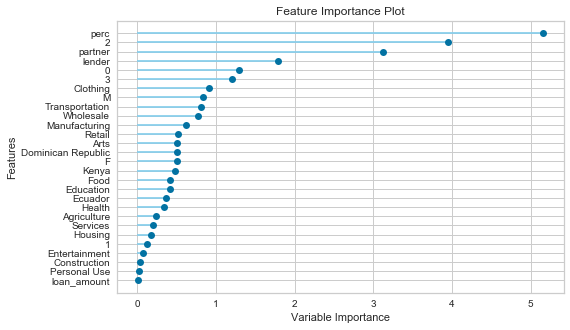

In [17]:
#feature importance
plot_model(lr, 'feature')

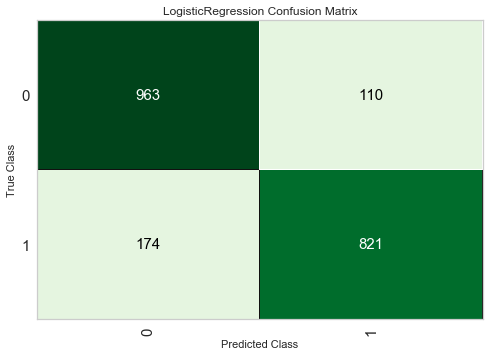

In [18]:
#auc
plot_model(lr, 'confusion_matrix')

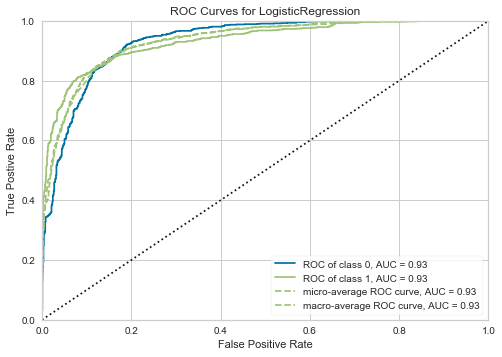

In [19]:
#auc
plot_model(lr, 'auc')

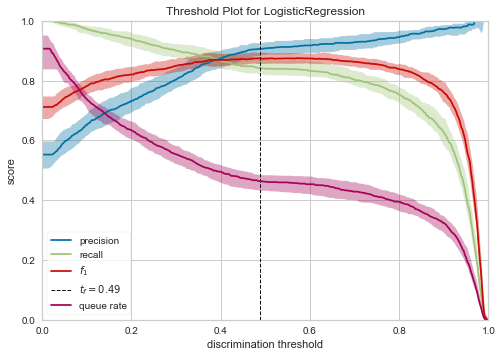

In [20]:
#threshold
plot_model(lr, 'threshold')

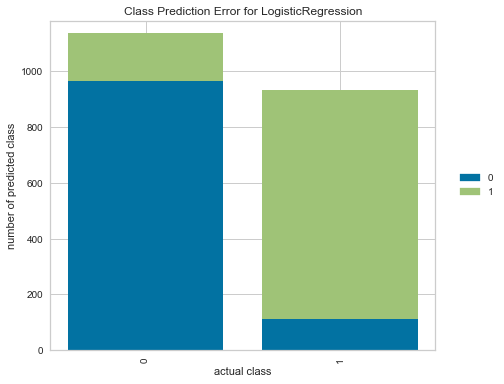

In [21]:
#error plot
plot_model(lr, 'error')